In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import re
import random
import string
import spacy
import joblib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading the dataset
df=pd.read_csv("dataset.csv")

In [3]:
df

,text
0,Turn on the profile picture guard to make your...
1,►►►hier klicken: http://bit.ly/freiheitsdressu...
2,"Weekend deal alert! Outdo Santa, today only, w..."
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...
4,Easy & convenient access to professional guida...
...,...
99995,What are you doing to keep in shape this winte...
99996,Nature''''s Hidden Gems: Top Natural Antibioti...
99997,"After over a year of playing shows, we are ext..."
99998,"Tried, tested, and trusted by the world''''s b..."


In [4]:
#checking null values

In [5]:
df.isna().sum()

text    9493
dtype: int64

In [6]:
#handling null values
df.dropna(inplace=True)

In [7]:
df

,text
0,Turn on the profile picture guard to make your...
1,►►►hier klicken: http://bit.ly/freiheitsdressu...
2,"Weekend deal alert! Outdo Santa, today only, w..."
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...
4,Easy & convenient access to professional guida...
...,...
99995,What are you doing to keep in shape this winte...
99996,Nature''''s Hidden Gems: Top Natural Antibioti...
99997,"After over a year of playing shows, we are ext..."
99998,"Tried, tested, and trusted by the world''''s b..."


In [8]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90507 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    90507 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [9]:
#loading the data having labels
df1=pd.read_csv("categorized_dataset.csv")

In [10]:
df1

,text,Category
0,Turn on the profile picture guard to make your...,Other
1,►►►hier klicken: http://bit.ly/freiheitsdressu...,Other
2,"Weekend deal alert! Outdo Santa, today only, w...",Ecommerce
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...,Other
4,Easy & convenient access to professional guida...,Healthcare
...,...,...
99995,What are you doing to keep in shape this winte...,Other
99996,Nature''''s Hidden Gems: Top Natural Antibioti...,Other
99997,"After over a year of playing shows, we are ext...",Entertainment
99998,"Tried, tested, and trusted by the world''''s b...",Other


In [11]:
#here i am doing inferential statitics 
#it means collecting subset of data and conclude that entire population
df2=df1.head(10000)

In [12]:
df2

,text,Category
0,Turn on the profile picture guard to make your...,Other
1,►►►hier klicken: http://bit.ly/freiheitsdressu...,Other
2,"Weekend deal alert! Outdo Santa, today only, w...",Ecommerce
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...,Other
4,Easy & convenient access to professional guida...,Healthcare
...,...,...
9995,Get 3 Pack - 9 Pairs Of Adidas Ankle Grip Sock...,Ecommerce
9996,Time to Start your Holiday Projects at Blacks.ca,Other
9997,We know how we''ll be spending this weekend ?,Other
9998,Atlas Furniture Black Friday Announcement,Other


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9405 non-null   object
 1   Category  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


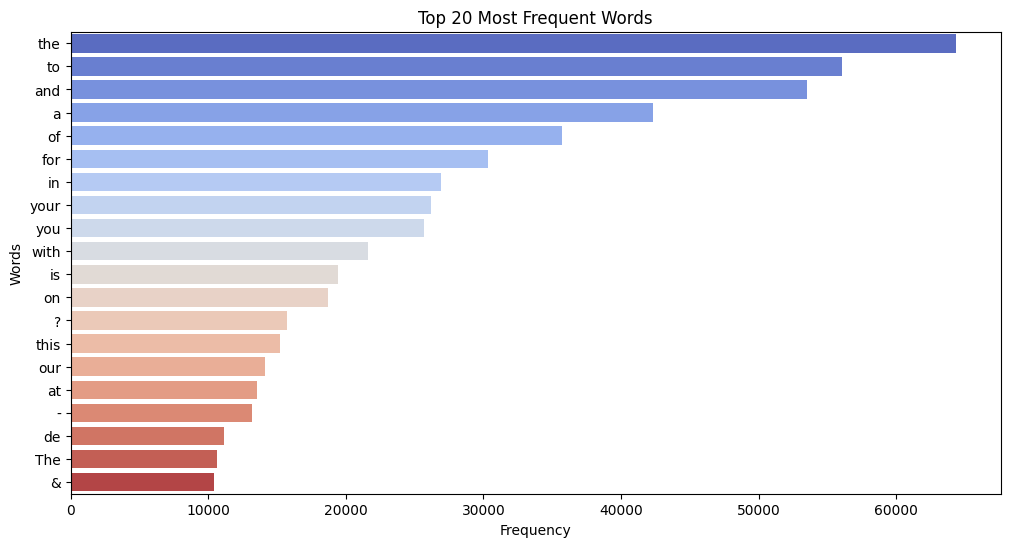

In [14]:
#before cleaning the data checking which word most number of repeated
word_freq = pd.Series(" ".join(df["text"]).split()).value_counts()[:20]
plt.figure(figsize=(12, 6))
sns.barplot(x=word_freq.values, y=word_freq.index, palette="coolwarm")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words")
plt.show()

In [15]:
#cleaning the data using spacy and re
nlp = spacy.load("en_core_web_sm")

# Text cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"\@\w+|\#", "", text)  # Remove mentions and hashtags
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[⭐]+", "", text)  # Remove star symbols
    
    doc = nlp(text)
    text = " ".join([token.lemma_ for token in doc if token.text not in STOP_WORDS])  # Remove stopwords & lemmatize
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    
    return text


In [16]:
#applying to text data
df2["text"] = df2["text"].apply(clean_text)

In [17]:
#checking null values
df2.isna().sum()

text        0
Category    0
dtype: int64

In [18]:
#if have null values handling null values using dropna
df2.dropna(inplace=True)

In [19]:
df1

,text,Category
0,Turn on the profile picture guard to make your...,Other
1,►►►hier klicken: http://bit.ly/freiheitsdressu...,Other
2,"Weekend deal alert! Outdo Santa, today only, w...",Ecommerce
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...,Other
4,Easy & convenient access to professional guida...,Healthcare
...,...,...
99995,What are you doing to keep in shape this winte...,Other
99996,Nature''''s Hidden Gems: Top Natural Antibioti...,Other
99997,"After over a year of playing shows, we are ext...",Entertainment
99998,"Tried, tested, and trusted by the world''''s b...",Other


In [20]:
#renaming column name
df=df2.rename(columns={"Category":"category"})

In [21]:
df

,text,category
0,turn profile picture guard profile picture sec...,Other
1,► ► ► hier klicken click,Other
2,weekend deal alert outdo santa today toy truly,Ecommerce
3,teenage girl share big secret life waht strugg...,Other
4,easy convenient access professional guidance r...,Healthcare
...,...,...
9995,pack pair adidas ankle grip sock start winter ...,Ecommerce
9996,time start holiday project blacksca,Other
9997,know spend weekend,Other
9998,atlas furniture black friday announcement,Other


In [22]:
#replacing categerial to numerical data using replace method
df.replace({"Education":0, "Ecommerce":1, "Technology":2,"Healthcare":3, "Entertainment":4,"Finance":5,"News":6, 
"Travel":7, "Sports":8, "Other":9},inplace=True)

In [23]:
#checking category of lables using groupby
category = df.groupby(['category']).count().unstack(level=1).fillna(0)

In [24]:
category

      category
text  0            505
      1           1470
      2            638
      3            214
      4            423
      5            173
      6             74
      7            148
      8            109
      9           6246
dtype: int64

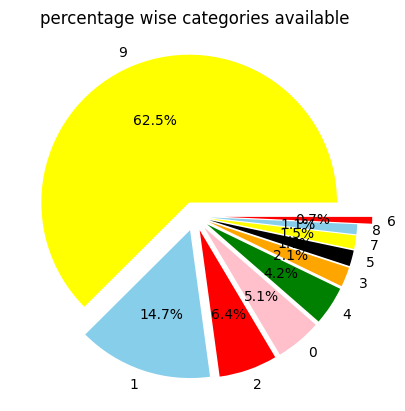

In [25]:
#here ploting the data
df["category"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", colors=["yellow", "skyblue","red","pink","green","orange","black"],explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2])
                                                                        
plt.title("percentage wise categories available")
plt.ylabel("")
plt.show()

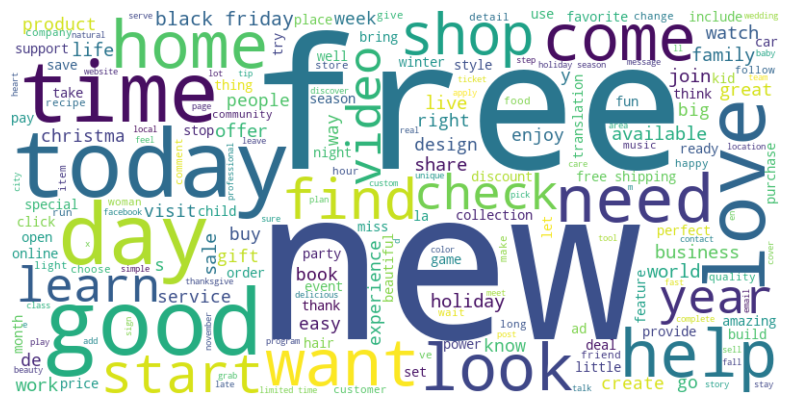

In [26]:
#ploting text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df["text"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

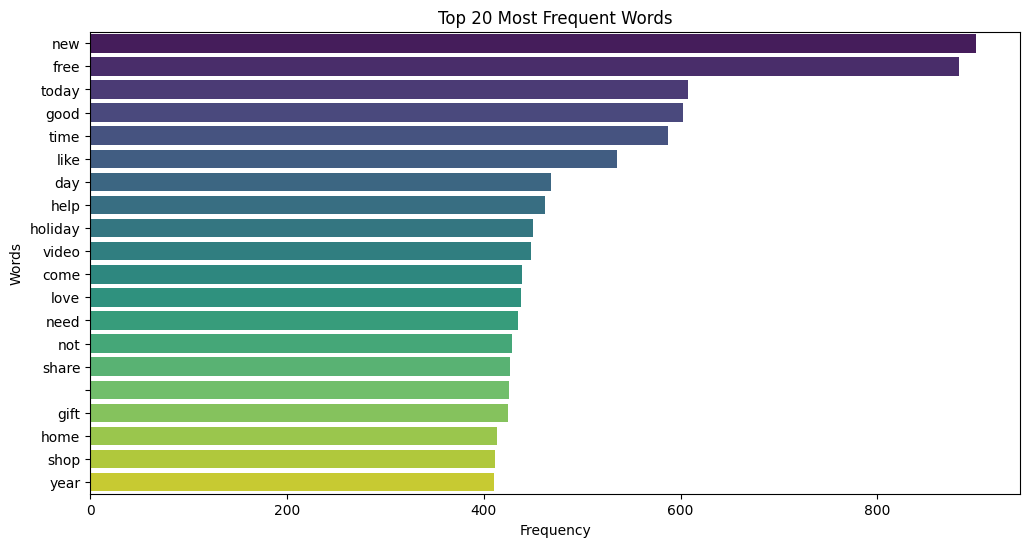

In [27]:
#after cleaning the data, checking which word occuring more number times
word_freq = pd.Series(" ".join(df["text"]).split()).value_counts()[:20]
plt.figure(figsize=(12, 6))
sns.barplot(x=word_freq.values, y=word_freq.index, palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words")
plt.show()

In [28]:
#converting text data into numerical using TfidfVectorizer class
tfidf = TfidfVectorizer(max_features=40)
tfidf_matrix = tfidf.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['category'] = df['category']
tfidf_melted = tfidf_df.melt(id_vars='category', var_name='word', value_name='tfidf_score')

In [29]:
tfidf_df

,available,black,business,check,come,day,de,family,find,free,...,shop,start,time,today,video,want,watch,work,year,category
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.583760,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
9996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.594633,0.548117,0.0,0.0,0.0,0.0,0.0,0.0,9
9997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
9998,0.0,0.708776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9


In [30]:
#here checking scores of word
s = tfidf_melted.groupby("word")["tfidf_score"].sum().sort_values(ascending=False)
print(s)


word
new          497.430830
free         454.135689
today        339.505852
good         332.078400
time         313.595199
like         282.898455
help         274.998308
holiday      261.550963
day          252.728335
come         245.277471
need         244.966777
shop         242.717026
video        240.527585
love         239.624008
gift         238.183878
home         235.786387
not          235.206430
share        229.436026
find         225.786195
year         224.029666
look         218.495973
start        217.460110
check        208.180452
sale         206.714726
want         200.937089
learn        199.373408
watch        198.536846
available    194.091459
offer        192.737001
friday       187.555186
family       187.464580
life         186.077308
black        183.821346
join         179.266457
great        177.165903
order        172.495687
business     166.688060
know         166.191000
work         162.810223
de           137.134957
Name: tfidf_score, dtype: float64


In [31]:
#spliting the data into 80 - 20 rule
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.20, random_state=42)

In [32]:
#feature engineering
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [33]:
#creating suitable model 
model = LogisticRegression(max_iter=1000, random_state=42)
#model training
model.fit(X_train_tfidf, y_train)
#model prediction
y_pred = model.predict(X_test_tfidf)

In [34]:
len(X_train)

8000

In [35]:
len(y_train)

8000

In [36]:
len(X_test)

2000

In [37]:
y_test

6252    9
4684    9
1731    9
4742    9
4521    9
       ..
6412    9
8285    9
7853    9
1095    9
6929    9
Name: category, Length: 2000, dtype: int64

In [38]:
y_test.values

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

In [39]:
y_pred

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

In [40]:
X_test

6252    time brine goodbye bland dry turkey truly juic...
4684    preferred customer free shipping eligible orde...
1731    party fever myleene klass model glamourous new...
4742    know history green bean casserole impress than...
4521    time listen business way big ve imagine want d...
                              ...                        
6412    woman retail store awesomecolombianjeansonlinecom
8285    good gift christmas lol funny talk toy child p...
7853                     contribute idylic campaign click
1095    have holiday party gift exchange get stuff lif...
6929    family come dump potpourri table party savesom...
Name: text, Length: 2000, dtype: object

In [41]:
#cheking model having overfitting and underfiting
print("model score of known data :",model.score(X_train_tfidf,y_train)) 
print("model score of unknown data :",model.score(X_test_tfidf, y_test))
print("model working perfectly")

model score of known data : 0.859125
model score of unknown data : 0.8165
model working perfectly


In [42]:
#model accuracy score
print("model accuracy score:",accuracy_score(y_test, y_pred))

model accuracy score: 0.8165


In [43]:
#creating a report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76       113
           1       0.94      0.79      0.86       257
           2       0.97      0.43      0.59       135
           3       0.92      0.30      0.45        37
           4       0.86      0.20      0.33        94
           5       1.00      0.07      0.12        46
           6       0.00      0.00      0.00        11
           7       1.00      0.14      0.25        21
           8       0.00      0.00      0.00        19
           9       0.78      1.00      0.88      1267

    accuracy                           0.82      2000
   macro avg       0.75      0.35      0.42      2000
weighted avg       0.83      0.82      0.78      2000



In [44]:
df3 = pd.DataFrame({"text": X_test, "actual": y_test,"predicted":y_pred})

In [45]:
df3

,text,actual,predicted
6252,time brine goodbye bland dry turkey truly juic...,9,9
4684,preferred customer free shipping eligible orde...,9,9
1731,party fever myleene klass model glamourous new...,9,9
4742,know history green bean casserole impress than...,9,9
4521,time listen business way big ve imagine want d...,9,9
...,...,...,...
6412,woman retail store awesomecolombianjeansonlinecom,9,9
8285,good gift christmas lol funny talk toy child p...,9,9
7853,contribute idylic campaign click,9,9
1095,have holiday party gift exchange get stuff lif...,9,9


In [46]:
#storing output data in csv file
df3.to_csv("task2.csv",index=False)

In [47]:
# model saving using joblib
joblib.dump(model, 'model_joblib')
print("Model got saved")

Model got saved


In [48]:
mj = joblib.load('model_joblib')
print(mj.predict(X_test_tfidf))

[9 9 9 ... 9 9 9]
